In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mltools import my_convert_to_number
from wordcloud import WordCloud
from collections import Counter
sns.set(style="darkgrid")

In [2]:
odi_df = pd.read_csv('ODI-2022.csv',delimiter=";")

### Number of records

In [3]:
print(len(odi_df.index))

304


### Number of attributes

In [4]:
print(len(odi_df.columns))

17


### Attributes are
    

In [5]:
print((odi_df.columns))

Index(['Tijdstempel', 'What programme are you in?',
       'Have you taken a course on machine learning?',
       'Have you taken a course on information retrieval?',
       'Have you taken a course on statistics?',
       'Have you taken a course on databases?', 'What is your gender?',
       'Chocolate makes you.....', 'When is your birthday (date)?',
       'Number of neighbors sitting around you?', 'Did you stand up?',
       'What is your stress level (0-100)?',
       'You can get 100 euros if you win a local DM competition, or we don’t hold any competitions and I give everyone some money (not the same amount!). How much do you think you would deserve then? ',
       'Give a random number', 'Time you went to be Yesterday',
       'What makes a good day for you (1)?',
       'What makes a good day for you (2)?'],
      dtype='object')


### Replace columns name

In [6]:
 odi_df.columns = ['time',\
                   'program',\
                   'ML',\
                   'IR',\
                   'Statistics',\
                   'DB',\
                   'Gender',\
               'Chocolate_influence',\
                   'Birthday',\
                   'neighbors',\
                   'Stand_Up',\
                   'Stress',\
              'Euros_Question',\
                   'random_number',\
                   'time_to_bed',\
                   'good_day_1',\
                   'good_day_2']
display(odi_df)

,time,program,ML,IR,Statistics,DB,Gender,Chocolate_influence,Birthday,neighbors,Stand_Up,Stress,Euros_Question,random_number,time_to_bed,good_day_1,good_day_2
0,4-5-2022 12:12:07,artificial intelligence,yes,0,mu,nee,female,neither,02.05.1998,0,no,0,5,888,23:00,coffee,sun
1,4-5-2022 12:12:07,big data,yes,0,mu,nee,male,fat,29-02-2000,0,yes,200,1,12,32,7777,8964
2,4-5-2022 12:12:09,Computational Science,yes,1,mu,ja,male,fat,29-06-1998,1,no,0,100,9,x,0,0
3,4-5-2022 12:12:09,Bioinformatics and Systems Biology,yes,0,unknown,nee,male,neither,11/05/97,0,no,20,100,31,14:00,good food,no stress
4,4-5-2022 12:12:15,AI,yes,1,mu,ja,male,fat,03-10-1997,0,no,2,100,86,07:20,Sunshine,Good Food
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,4-5-2022 12:35:31,Ai,yes,1,unknown,nee,not willing to answer,fat,1/1/1956,2,no,30,99,6,5,Yes,No
300,4-5-2022 12:37:05,E,yes,1,mu,ja,male,slim,9,9,yes,9,5,0,9,9,9
301,4-5-2022 12:41:59,MSc Computational Science,no,0,mu,nee,male,I have no idea what you are talking about,17/07/1995,0,no,666,1,123,555,Good food,Sleep more than 6 hours
302,4-5-2022 12:54:39,Artificial Intelligence,yes,0,mu,nee,not willing to answer,neither,17,0,yes,70,87,7,0,nice weather,good mood


### Gender distribution

Gender
female                   102
gender fluid               6
intersex                   1
male                     183
not willing to answer     12
Name: Gender, dtype: int64

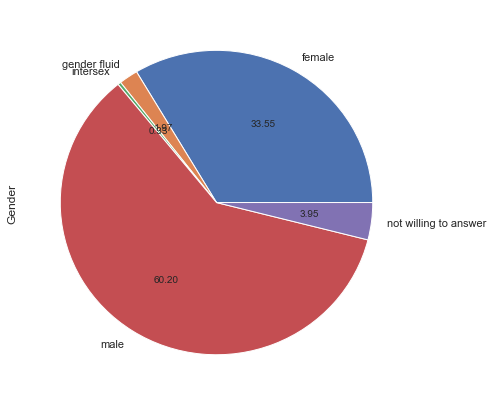

In [7]:
display(odi_df.groupby('Gender')['Gender'].count())
odi_df.groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
#mask = (odi_df['Gender']!='male') & (odi_df['Gender']!='female')
#odi_df['Gender'].loc[mask]

### Random number

In [8]:
odi_df['random_number'] = odi_df['random_number'].map(my_convert_to_number)
odi_df['Stress'] = odi_df['Stress'].map(my_convert_to_number)
odi_df['random_number'] = odi_df['random_number'].map(my_convert_to_number)
odi_df['neighbors'] = odi_df['neighbors'].map(my_convert_to_number)
odi_df['Euros_Question'] = odi_df['Euros_Question'].map(my_convert_to_number)


### Distribution of gender who has entred random numbers noise

In [9]:
display(odi_df[['Stress','random_number','Gender','Chocolate_influence','time_to_bed']].loc[odi_df['random_number'].isna()==False])


,Stress,random_number,Gender,Chocolate_influence,time_to_bed
0,0.0,8.880000e+02,female,neither,23:00
1,200.0,1.200000e+01,male,fat,32
2,0.0,9.000000e+00,male,fat,x
3,20.0,3.100000e+01,male,neither,14:00
4,2.0,8.600000e+01,male,fat,07:20
...,...,...,...,...,...
299,30.0,6.000000e+00,not willing to answer,fat,5
300,9.0,0.000000e+00,male,slim,9
301,666.0,1.230000e+02,male,I have no idea what you are talking about,555
302,70.0,7.000000e+00,not willing to answer,neither,0


In [10]:
odi_df.corr(method ='pearson')

,neighbors,Stress,Euros_Question,random_number
neighbors,1.000000,-0.003453,-0.006193,-0.005803
Stress,-0.003453,1.000000,-0.006156,-0.000000
Euros_Question,-0.006193,-0.006156,1.000000,-0.006399
random_number,-0.005803,-0.000000,-0.006399,0.000000


### Pie chart of Gender put None as random number - no rule obeing 

Text(0.5,1,'gender distribution for correct data in random number')

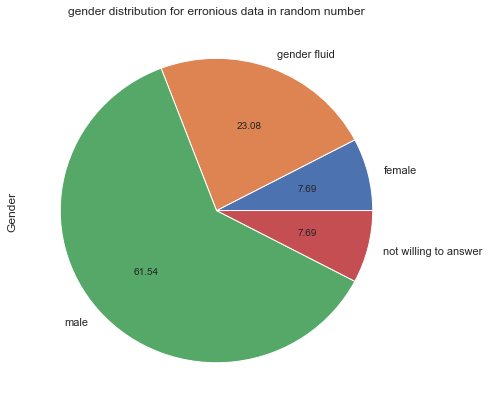

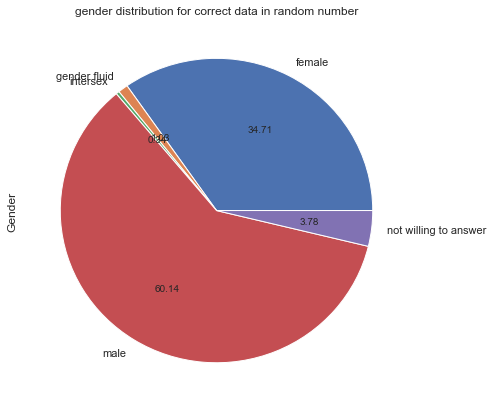

In [11]:
plt.figure(1)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for erronious data in random number')

plt.figure(2)
odi_df[['Gender']].loc[odi_df['random_number'] .isna()==False].groupby('Gender')['Gender'].count().plot.pie(autopct='%.2f',figsize=(7,7))
plt.title('gender distribution for correct data in random number')


### Good day distribution

In [24]:
dictionary=Counter(list(odi_df['good_day_1'].map(lambda x: x.lower()))+list(odi_df['good_day_2'].map(lambda x: x.lower())))
sns.boxplot(pd.Series(dictionary, index=dictionary.keys()).sort_values(ascending=False), x=index)
#cloud = WordCloud(max_font_size=80,colormap="hsv").generate_from_frequencies(dictionary)
#plt.figure(figsize=(16,12))
#plt.imshow(cloud, interpolation='bilinear')
#plt.axis('off')
#plt.show()

#plt.bar(dictionary)

NameError: name 'index' is not defined